# LAb5: Generalização de modelos lineares

<hr style="border:1px  solid black"> </hr>

## Nome: Eduardo Marques
## Número: 45977

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Dados: $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$
### Considere os dados do $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$, divididos em três conjuntos, treino/validação/teste, segundo os comandos da próxima célula.
* ### X1a: dados de treino (array de $319\times30$)
* ### y1a: classe do dados de treino
* ### X1b: dados de validação (array de $100\times30$)
* ### y1b: classe do dados de validação
* ### X2: dados de treino (array de $150\times30$)
* ### y2: classe do dados de teste

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#ATENÇÃO: Considerar os casos malígnos como positivos (classe 1)
#Necessário inverter classes
y=np.abs(y-1)
################################################################

#divitir em treino, validação e teste
X1,X2,y1,y2=train_test_split(X,y,test_size=150,stratify=y,random_state=42)
X1a,X1b,y1a,y1b=train_test_split(X1,y1,test_size=100,stratify=y1,random_state=42)

# Pergunta 1: Discriminantes logístico
##  Considere um discriminante logístico com regularização $\ell_1$ (lasso) e com os parâmetros $\texttt{C=2}$, $\texttt{solver='saga'}$ e $\texttt{max_iter=5000}$. Treine o classificador com os conjuntos de treino e validação (419 exemplos).
### a) Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### b) Imprima o índice e os nomes (feature names) das dimensões dos dados que não interferem no processo de classificação (dimensões descartadas).
### c) Calibre este classificador de maneira a ter um número máximo de falsos negativos no teste inferior o igual a 5, e ao mesmo tempo mantendo o número total de erros igual à da alínea 1.a).
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores das alíneas 1.a) e 1.c).

## 1.a)

In [2]:
print(X1.shape)
lr = LogisticRegression(penalty='l1', C=2, solver='saga', max_iter=5000).fit(X1, y1)
y2e=lr.predict(X2)

MC1a = confusion_matrix(y2,y2e)

print('Nº total de erros:',np.sum(y2!=y2e))
print('Matriz de confusão a baixo',)
print(MC1a)

(419, 30)
Nº total de erros: 12
Matriz de confusão a baixo
[[93  1]
 [11 45]]


## 1.b)

In [3]:
w = lr.coef_.squeeze()
idx = np.argwhere(w==0).squeeze()

nomes = D.feature_names
print('Feature e Nome:')
for i in idx:
    print(i, ':', nomes[i]) if (len(str(i))==2) else print(i, ':', nomes[i])
print('Total de Dimensões Descartadas:', idx.shape[0])

Feature e Nome:
4 : mean smoothness
9 : mean fractal dimension
10 : radius error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
24 : worst smoothness
29 : worst fractal dimension
Total de Dimensões Descartadas: 11


## 1.c)

In [4]:
y2c = lr.decision_function(X2)
v = 0

for t in (np.arange(-2, 2, 0.01)): 
    #se houver 5 ou menos FN e 12 erros
    if (confusion_matrix(y2, y2c >= t)[1,0] <= 5) and len(((y2c >= t) != y2)==12):
        v = t
        

MC1c = confusion_matrix(y2, y2c >= v)
print('Nº total de erros: ', np.sum(y2 != (y2c >= v)))
print('Matriz de confusão a baixo')
print(MC1c)

Nº total de erros:  12
Matriz de confusão a baixo
[[87  7]
 [ 5 51]]


## 1.d)

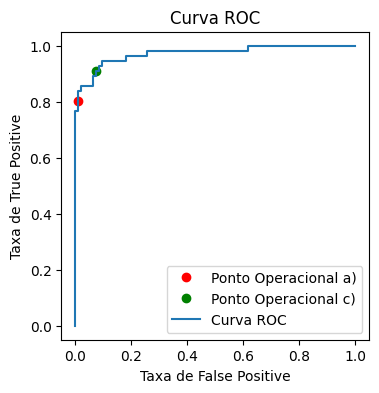

In [5]:
fpr, tpr, thresholds = roc_curve(y2, y2c)

p1a = MC1a[0,1]/(MC1a[0,1] + MC1a[0,0])
p2a = MC1a[1,1]/(MC1a[1,1] + MC1a[1,0])

p1c = MC1c[0,1]/(MC1c[0,1] + MC1c[0,0])
p2c = MC1c[1,1]/(MC1c[1,1] + MC1c[1,0])

plt.figure(figsize=(4,4))

plt.plot(p1a, p2a, 'o', color='r', label='Ponto Operacional a)')
plt.plot(p1c, p2c, 'o', color='g', label='Ponto Operacional c)')

# Plot da curva ROC
plt.plot(fpr, tpr, label = 'Curva ROC')

plt.axis('scaled')
plt.title('Curva ROC')
plt.ylabel('Taxa de True Positive')
plt.xlabel('Taxa de False Positive')
plt.legend()
plt.show()

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - SVMs:
## Considere o classificador da função $\texttt{SVC}$ com os parâmetros $\texttt{kernel='rbf'}$ e $\texttt{C=2}$.
### a) Faça um pré-processamento dos dados usando a função $\texttt{StandardScaler}$. Treine esta função com os dados treino e aplique a transformação aos três conjuntos (treino, validação e teste). Use os dados pré-processados nas alíneas seguintes.
### b) Pertende-se estimar o valor do parâmetro $\texttt{gamma}$  ($\gamma$) mais adequado para este problema. Para tal, use o conjunto de validação para achar o valor de $\gamma$ que resulta no menor número de erros (treine o $\texttt{SVC}$ com o conjunto de treino). Teste os seguintes valores de $\gamma$: $[0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]$. Volte a treinar o classificador $\texttt{SVC}$ com os dados de treino e validação, e com o melhor valor de $\gamma$. Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### c)  Calibre o classificador da alínea anterior de modo a obter zero (0) falsos negativos nos dados de teste. Após a calibração qual o número mínimo de falso positivos obtidos no teste?
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores das alíneas 1.b) e 1.c).

## 2.a)

In [6]:
from sklearn.preprocessing import StandardScaler

sc   = StandardScaler().fit(X1a)

X1an = sc.transform(X1a)
X1bn = sc.transform(X1b)
X2n  = sc.transform(X2)

## 2.b)

In [7]:
scoreTop = 0
bestG = 0
gList = [0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]

for g in gList:
    svm = SVC(kernel='rbf', C=2, gamma=g).fit(X1an,y1a)
    score = svm.score(X1bn, y1b) # usar o conjunto de validação
    if score > scoreTop:
        scoreTop = score
        bestG = g

MC2b = confusion_matrix(y1b,svm.predict(X1bn))
print('Melhores Resultados:')
print('Gamma:', bestG)
print('Score:', scoreTop)
print('Matriz de confusão a baixo')
print(MC2b)

Melhores Resultados:
Gamma: 0.01
Score: 0.99
Matriz de confusão a baixo
[[63  0]
 [ 2 35]]


## 2.c)

In [8]:
threshold = 1

while True:
    y2c = svm.decision_function(X2n) > threshold
    mcAux = confusion_matrix(y2, y2c)
    fn = mcAux[1, 0]    
    if fn == 0:
        fp = mcAux[0, 1]
        break
    threshold -= 0.001

MC2c = confusion_matrix(y2, y2c)
print('Falsos negativos:', fn) #tem de ser 0
print('Falsos positivos para o teste:', fp)
print('Matriz de confusão a baixo')
print(MC2c)

Falsos negativos: 0
Falsos positivos para o teste: 9
Matriz de confusão a baixo
[[85  9]
 [ 0 56]]


## 2.d)

/var/folders/rm/wphhyvx14d30yhg_0366zmm80000gn/T/ipykernel_2301/228751831.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(p1b, p2b, 'ok', color='r', label = 'Ponto Operacional 2b')
/var/folders/rm/wphhyvx14d30yhg_0366zmm80000gn/T/ipykernel_2301/228751831.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(p1c, p2c, 'ok', color='g', label = 'Ponto Operacional 2c')


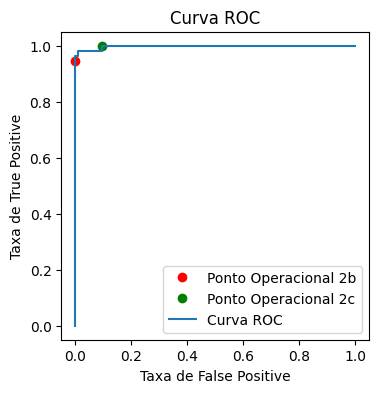

In [9]:
X1n = sc.transform(X1)
svm = SVC(kernel='rbf', C=2, gamma=bestG).fit(X1n,y1)

y2d = svm.decision_function(X2n)

fpr, tpr, thresholds = roc_curve(y2, y2d)

p1b=MC2b[0,1]/(MC2b[0,1]+MC2b[0,0])
p2b=MC2b[1,1]/(MC2b[1,1]+MC2b[1,0])

p1c=MC2c[0,1]/(MC2c[0,1]+MC2c[0,0])
p2c=MC2c[1,1]/(MC2c[1,1]+MC2c[1,0])

# Plot do ponto


plt.figure(figsize=(4,4))
plt.plot(p1b, p2b, 'ok', color='r', label = 'Ponto Operacional 2b')
plt.plot(p1c, p2c, 'ok', color='g', label = 'Ponto Operacional 2c')

# Plot da curva ROC
plt.plot(fpr, tpr, label = 'Curva ROC')

plt.axis('scaled')
plt.title('Curva ROC')
plt.ylabel('Taxa de True Positive')
plt.xlabel('Taxa de False Positive')
plt.legend()
plt.show()